In this notebook, the best model is loaded and using the images collected from OpenCV, the model is used to make predictions of images that are unlabelled.

In [90]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2 as cv
import os

In [52]:
ROOT = os.getcwd()
ROOT

'c:\\Users\\dell-2019\\Desktop\\Sign Language Detection'

In [89]:
model = keras.models.load_model('models/vgg16-90.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [4]:
TOP = 100
BOTTOM = 300
RIGHT = 150
LEFT = 350
CLASSES = dict(zip(range(0, 26), list(map(chr, range(97, 123))))) # labels from A to Z

In [100]:
def process_image():
    path = os.path.join(ROOT, 'images/unlabelled')
    batch = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input, rescale=1./255)
    data = batch.flow_from_directory(path, target_size=(64, 64), class_mode='categorical', shuffle=False)

    img, _ = next(data)

    return img

In [ ]:
cam = cv.VideoCapture(0)
img_counter = 0

if os.getcwd != ROOT:
    os.chdir(ROOT)

os.chdir('images/unlabelled/test') # path where the unlabelled images are stored

while True:
    ret, frame = cam.read()
    # filpping the frame to prevent inverted image of captured frame
    frame = cv.flip(frame, 1)
    
    if not ret:
        print("Please check if the camera is connected properly or is being used by another program")
        break

    # Drawing ROI on frame copy
    cv.imshow("Frame", frame)

    frame_copy = frame.copy()
    roi = frame[TOP:BOTTOM, RIGHT:LEFT] # get the region that we want to segment

    k = cv.waitKey(1)
    if k%256 == 27:
        break
    elif k%256 == 32: # SPACE pressed
        print("Saving the image")
        try:
            # save the image
            img_name = "{}.png".format(img_counter)
            path = os.getcwd() # get current working directory

            # save the image
            cv.imwrite(os.path.join(path , img_name), roi)

            # img = process_image()
            # plt.imshow(img[0])
            # plt.show()
            # pred = model.predict(img)
            # print(CLASSES[np.argmax(pred[0])])
        except Exception as e:
            print(e)
            break
            
    # Display the frame with segmented hand
    cv.rectangle(frame_copy, (LEFT, TOP), (RIGHT, BOTTOM), (255,128,0), 3)
    cv.imshow("Hand Region", roi)

cam.release()
cv.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 10 images belonging to 1 classes.


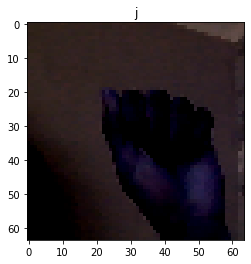

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


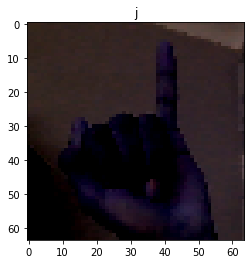

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


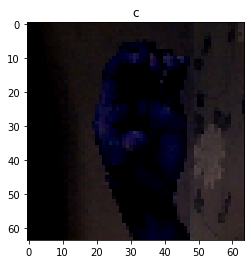

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


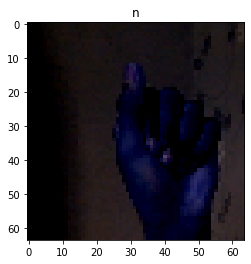

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


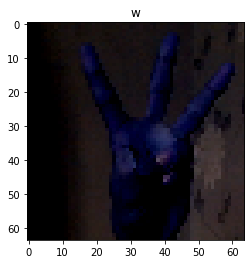

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


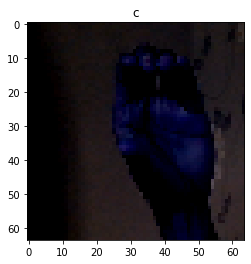

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


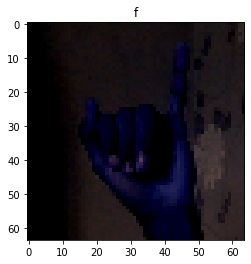

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


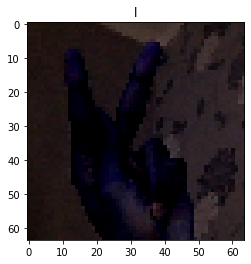

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


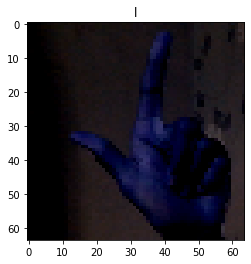

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


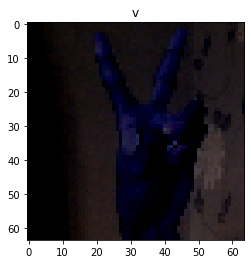

In [106]:
# load the image and make a prediction on the image
path = os.path.join(ROOT, 'images/unlabelled')

batch = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input, rescale=1./255)
data = batch.flow_from_directory(path, target_size=(64, 64), class_mode='categorical', shuffle=True)

img, label = next(data)

# get the prediction for each image
pred = model.predict(img)

for i in range(len(pred)):
    plt.imshow(img[i], cmap='gray')
    plt.title(CLASSES[np.argmax(pred[i])])
    plt.show()